<a href="https://colab.research.google.com/github/AngelicaDC/BEDUpython/blob/main/NLPpalabras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
## Graficación
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords

In [3]:
## Descargar paquetes de nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [8]:
stopwords?

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
df = pd.read_json('/content/drive/MyDrive/BEDU/Remoto Datasets/Remoto new_york_times_bestsellers-clean.json')
df.head()

,amazon_product_url,author,description,publisher,title,oid,bestsellers_date.numberLong,published_date.numberLong,rank.numberInt,rank_last_week.numberInt,weeks_on_list.numberInt,price.numberDouble
0,http://www.amazon.com/The-Host-Novel-Stephenie...,Stephenie Meyer,Aliens have taken control of the minds and bod...,"Little, Brown",THE HOST,5b4aa4ead3089013507db18c,1211587200000,1212883200000,2,1,3,25.99
1,http://www.amazon.com/Love-Youre-With-Emily-Gi...,Emily Giffin,A woman's happy marriage is shaken when she en...,St. Martin's,LOVE THE ONE YOU'RE WITH,5b4aa4ead3089013507db18d,1211587200000,1212883200000,3,2,2,24.95
2,http://www.amazon.com/The-Front-Garano-Patrici...,Patricia Cornwell,A Massachusetts state investigator and his tea...,Putnam,THE FRONT,5b4aa4ead3089013507db18e,1211587200000,1212883200000,4,0,1,22.95
3,http://www.amazon.com/Snuff-Chuck-Palahniuk/dp...,Chuck Palahniuk,An aging porn queens aims to cap her career by...,Doubleday,SNUFF,5b4aa4ead3089013507db18f,1211587200000,1212883200000,5,0,1,24.95
4,http://www.amazon.com/Sundays-at-Tiffanys-Jame...,James Patterson and Gabrielle Charbonnet,A woman finds an unexpected love,"Little, Brown",SUNDAYS AT TIFFANY’S,5b4aa4ead3089013507db190,1211587200000,1212883200000,6,3,4,24.99


In [ ]:
grouped_by_title = df.groupby('title')['description'].last()
grouped_by_title = grouped_by_title.str.lower()
grouped_by_title = grouped_by_title.str.strip()
grouped_by_title = grouped_by_title.dropna()
grouped_by_title = grouped_by_title.str.replace('\\n', '')
grouped_by_title = grouped_by_title.str.replace('\d', '')
grouped_by_title = grouped_by_title.str.replace('[^\w\s]', '')

tokenized = grouped_by_title.apply(nltk.word_tokenize)
all_words = tokenized.sum()

In [ ]:
stop_words = stopwords.words('english')
all_words_stop = [word for word in all_words if word not in stop_words]
freq_dist = nltk.FreqDist(all_words_stop)

In [ ]:
freq_dist.most_common(10)

[('woman', 62),
 ('series', 58),
 ('new', 58),
 ('detective', 53),
 ('book', 53),
 ('murder', 49),
 ('novel', 48),
 ('killer', 40),
 ('investigates', 40),
 ('must', 39)]

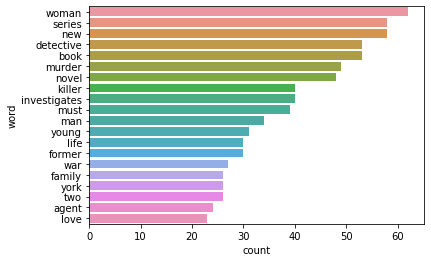

In [ ]:
most_common_20 = pd.DataFrame(freq_dist.most_common(20), columns=['word', 'count'])

fig = plt.figure()
ax = fig.add_subplot()
sns.barplot(data=most_common_20, y='word', x='count', ax=ax)
ax.tick_params(axis='x', rotation=80)

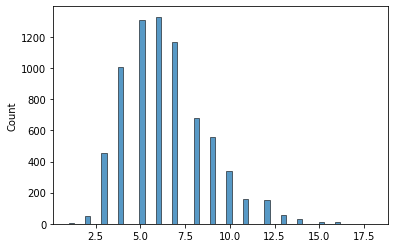

In [ ]:
world_lengths = [len(word) for word in all_words_stop]
sns.histplot(world_lengths);

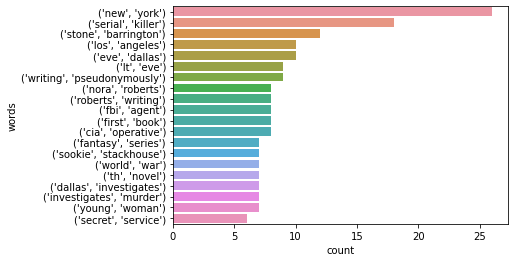

In [ ]:
# Bigramas - Palabras utillizadas en conjunto
text = nltk.Text(all_words_stop)
freq_dist_bigrams = nltk.FreqDist( list(nltk.bigrams(text)) )
common_20 = pd.DataFrame(freq_dist_bigrams.most_common(20), columns=['words', 'count'])
sns.barplot(data=common_20, x="count", y="words")

In [ ]:
# Word clouds

In [ ]:
from wordcloud import WordCloud

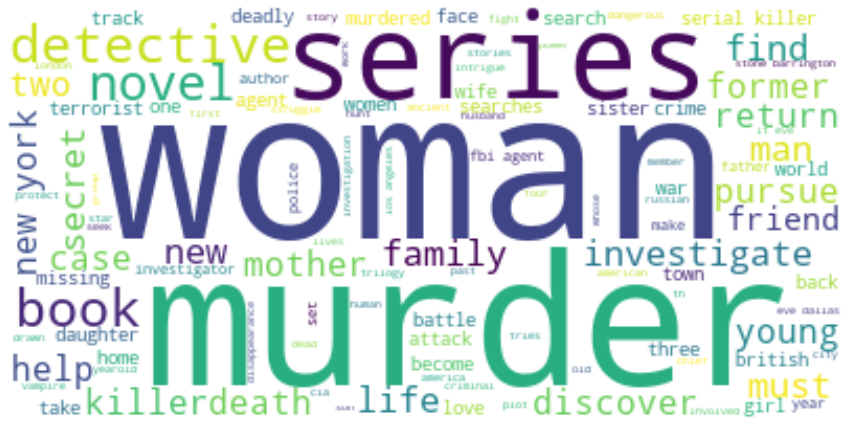

In [ ]:
wordcloud = WordCloud(max_font_size=100, background_color='white').generate(' '.join(all_words_stop))

plt.figure(figsize=(15,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
palabras_10 = [word for word in all_words_stop if len(word) >= 10]
freq_dist_10 = nltk.FreqDist(palabras_10)
freq_dist_10_7 = [(key, freq_dist_10[key]) for key in freq_dist_10 if freq_dist_10[key] >= 7]

dataframe = pd.DataFrame(freq_dist_10_7, columns=['word', 'count'])
dataframe

,word,count
0,investigate,14
1,stackhouse,7
2,paranormal,9
3,washington,8
4,investigator,19
5,barrington,12
6,investigation,9
7,disappearance,9
8,investigates,40
9,pseudonymously,9


In [ ]:
## K-Means

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/Remoto crimenes_locacion.csv')
df.head()

,codigo_crimen,latitud,longitud
0,8,-15.068712,0.157991
1,0,-4.065913,12.491768
2,1,3.141179,-12.090601
3,8,8.806998,14.316892
4,3,-5.773641,15.487286


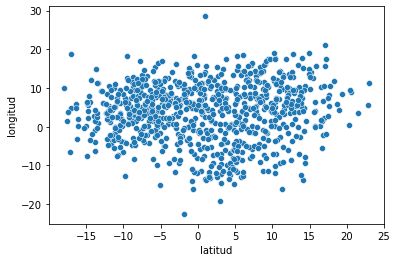

In [ ]:
sns.scatterplot(x=df['latitud'], y=df['longitud'])

In [ ]:
# k =6
from sklearn.cluster import KMeans

In [ ]:
k_means = KMeans(n_clusters=9, max_iter=100_000)
k_means.fit(df[['latitud', 'longitud']])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100000,
       n_clusters=9, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
centers = k_means.cluster_centers_

In [ ]:
centers

array([[  7.59254844,  -2.83094318],
       [ -4.37747668,  10.74582074],
       [-11.08277566,   5.70385061],
       [ 14.05672304,   5.60933326],
       [  4.30421923,   7.26954391],
       [ -2.83142732,   1.96863769],
       [  9.6609984 ,  14.30625169],
       [ -9.90736431,  -2.48280736],
       [  2.87693269, -10.49770806]])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


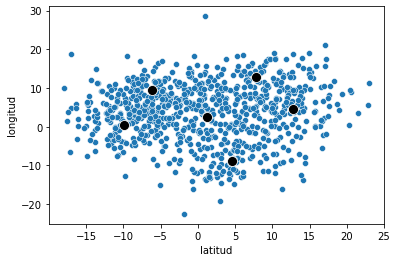

In [ ]:
sns.scatterplot(df['latitud'], df['longitud'])
sns.scatterplot(centers[:,0], centers[:,1], color='black', s=100)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


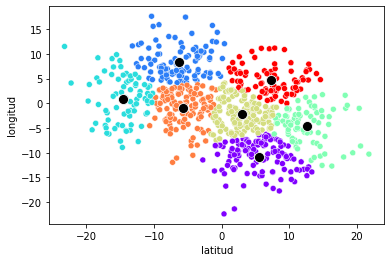

In [ ]:
fig = plt.figure()
ax = fig.add_subplot()
classificacion = k_means.predict(df[['latitud', 'longitud']])
sns.scatterplot(df['latitud'], df['longitud'], hue=classificacion, palette='rainbow', ax=ax)
sns.scatterplot(centers[:,0], centers[:,1], color='black', s=100, ax=ax)
ax.get_legend().remove()

In [ ]:
centers[:,0], centers[:,1],
centers

array([[  5.52573139, -10.82412276],
       [ -6.35412715,   8.36004507],
       [-14.50218331,   0.85843488],
       [ 12.602115  ,  -4.50540568],
       [  3.02520293,  -2.12486683],
       [ -5.66353887,  -0.970074  ],
       [  7.29149277,   4.70644622]])

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/Remoto distribucion_usuarios-1.csv')
df.head()

,codigo_de_usuario,producto_1,producto_2,producto_3,producto_4,latitud,longitud
0,1,0,0,0,0,14.277305,-5.958917
1,2,0,0,1,0,-9.958963,1.036839
2,3,0,0,1,0,7.859551,1.932572
3,4,1,1,1,1,-8.989976,6.969268
4,5,1,0,0,0,-6.641690,-0.777759


In [ ]:
k_means = KMeans(n_clusters=7, max_iter=100_000)
k_means.fit(df[['latitud', 'longitud']])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100000,
       n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


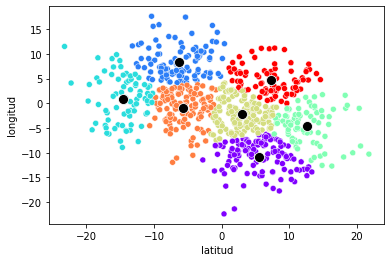

In [ ]:
centers = k_means.cluster_centers_
fig = plt.figure()
ax = fig.add_subplot()
classificacion = k_means.predict(df[['latitud', 'longitud']])
sns.scatterplot(df['latitud'], df['longitud'], hue=classificacion, palette='rainbow', ax=ax)
sns.scatterplot(centers[:,0], centers[:,1], color='black', s=100, ax=ax)
ax.get_legend().remove()


In [ ]:
df['group'] = classificacion
df['total'] = df['producto_1'] + df['producto_2'] + df['producto_3'] + df['producto_4']

In [ ]:
df.head()

,codigo_de_usuario,producto_1,producto_2,producto_3,producto_4,latitud,longitud,group,total
0,1,0,0,0,0,14.277305,-5.958917,3,0
1,2,0,0,1,0,-9.958963,1.036839,2,1
2,3,0,0,1,0,7.859551,1.932572,6,1
3,4,1,1,1,1,-8.989976,6.969268,1,4
4,5,1,0,0,0,-6.641690,-0.777759,5,1


In [ ]:
df['group'].value_counts()

4    144
5    132
0    116
1    109
6     87
3     83
2     78
Name: group, dtype: int64

In [ ]:
df['total'].value_counts()

1    303
2    294
0     79
3     67
4      6
Name: total, dtype: int64

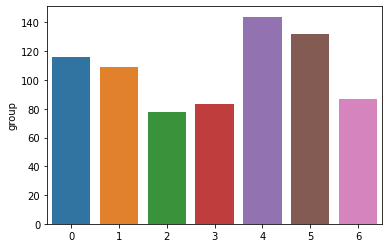

In [ ]:
counts = df['group'].value_counts()
sns.barplot(x=counts.index, y=counts)

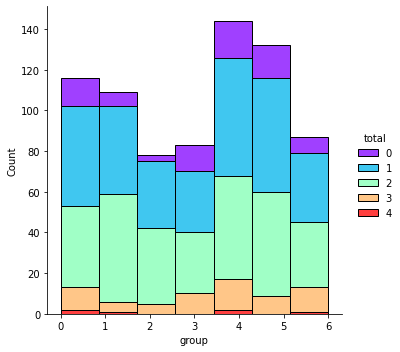

In [ ]:
sns.displot(data=df, x="group", hue='total', palette='rainbow', multiple='stack', bins=7);

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/Remoto breast_cancer_wisconsin.csv', index_col=0)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
df = df.drop(columns=['Unnamed: 32'])
df['diagnosis'] = df['diagnosis'].apply(lambda x: 1 if x == 'M' else 0)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
X = df.drop(columns=['diagnosis'])
y = df['diagnosis']

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [ ]:
logreg = LogisticRegression(max_iter=10_000)
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = logreg.predict(X_test)
y_pred

array([1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0])

In [ ]:
logreg.score(X_test, y_test)

0.9532163742690059

In [ ]:
from sklearn import metrics

In [ ]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[106,   6],
       [  2,  57]])

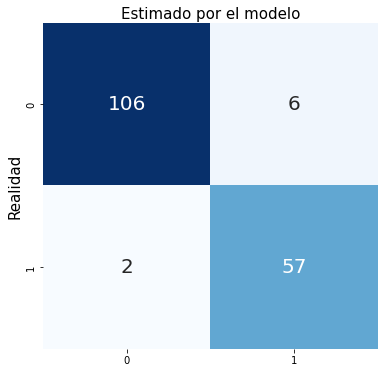

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, fmt='g', cmap="Blues", cbar=False, annot_kws={'size': 20})
ax.xaxis.set_label_position('top')
plt.ylabel('Realidad', fontsize=15)
plt.xlabel('Estimado por el modelo', fontsize=15);

In [ ]:
# Precision
# Exactitud
# Sensibilidad
# Especifidad

In [ ]:
print(metrics.precision_score(y_test, y_pred))
print(metrics.accuracy_score(y_test, y_pred))
print(metrics.recall_score(y_test, y_pred))

0.9047619047619048
0.9532163742690059
0.9661016949152542


In [ ]:
tn, fp, fn, tp = cnf_matrix.ravel()
print(tn / (tn + fp))

0.9464285714285714


In [ ]:
from sklearn.metrics import roc_curve, auc

In [ ]:
y_pred_proba = logreg.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:,1])
roc_auc = auc(fpr, tpr)

In [ ]:
roc_auc

0.9930387409200969